<a href="https://colab.research.google.com/github/Gio-Choi/Stock_Regime_Analysis/blob/main/MLP_model_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone_Dataset_Next.csv')

In [4]:
df

,Unnamed: 0,^GSPC,VIXCLS,CPIAUCSL,M2SL,FEDFUNDS,T10Y2Y,AAA,UNRATE,PCUOMFGOMFG,USPHCI,IQ,S&P_pct
0,2004-04-01,1132.170044,16.65,187.400,6191.2,1.00,2.26,5.73,5.6,141.8,91.28,103.7,0.0
1,2004-05-03,1117.489990,16.62,188.200,6268.1,1.00,2.19,6.04,5.6,143.3,91.52,104.1,0.0
2,2004-06-01,1121.199951,16.30,188.900,6270.5,1.03,2.11,6.01,5.6,142.9,91.73,103.4,1.0
3,2004-07-01,1128.939941,15.20,189.100,6284.3,1.26,1.93,5.82,5.5,143.2,91.95,103.9,1.0
4,2004-08-02,1106.619995,15.37,189.200,6310.6,1.43,1.82,5.65,5.4,143.7,92.15,103.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,2020-08-03,3294.610107,24.28,259.580,18357.4,0.10,0.45,2.25,8.4,193.0,121.22,122.1,1.0
197,2020-09-01,3526.649902,26.12,260.190,18575.2,0.09,0.55,2.31,7.9,192.9,121.97,122.8,1.0
198,2020-10-01,3380.800049,26.70,260.352,18735.7,0.09,0.54,2.35,6.9,193.7,122.93,123.0,0.0
199,2020-11-02,3310.239990,37.13,260.721,18969.8,0.09,0.71,2.30,6.7,194.5,123.41,124.0,0.0


In [5]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [7]:
dataset = df.values
dataset[:,2:12]

array([[16.65, 187.4, 6191.2, ..., 141.8, 91.28, 103.7],
       [16.62, 188.2, 6268.1, ..., 143.3, 91.52, 104.1],
       [16.3, 188.9, 6270.5, ..., 142.9, 91.73, 103.4],
       ...,
       [26.7, 260.352, 18735.7, ..., 193.7, 122.93, 123.0],
       [37.13, 260.721, 18969.8, ..., 194.5, 123.41, 124.0],
       [20.77, 261.564, 19124.7, ..., 196.7, 123.66, 125.5]], dtype=object)

In [8]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(dataset, test_size = 0.2, random_state = 42)
print("훈련 데이터 개수 : ", len(train_data))
print("테스트 데이터 개수 : ", len(test_data))

훈련 데이터 개수 :  160
테스트 데이터 개수 :  41


In [9]:
# split into input (X) and output (Y) variables
X = train_data[:,2:12].astype(float)
Y = train_data[:,-1]

In [10]:
X_test = test_data[:,2:12].astype(float)
Y_test = test_data[:,-1]
encoder_test = LabelEncoder()
encoder_test.fit(Y_test)
Y_test = encoder_test.transform(Y_test)

In [11]:
Y

array([0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0,
       1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0,
       1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0,
       1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0,
       1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0,
       0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0,
       0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0,
       1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0,
       1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0,
       0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0,
       1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0,
       0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0,
       1.0, 1.0, 1.0, 1.0], dtype=object)

In [12]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [18]:
def create_model():
  model = Sequential()
  model.add(Dense(10, input_shape=(10,), activation='elu'))
  model.add(BatchNormalization())
  model.add(Dense(32, activation='elu'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())  
  model.add(Dense(16, activation='elu'))
  model.add(BatchNormalization())
  model.add(Dense(4, activation='elu'))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])

  return model

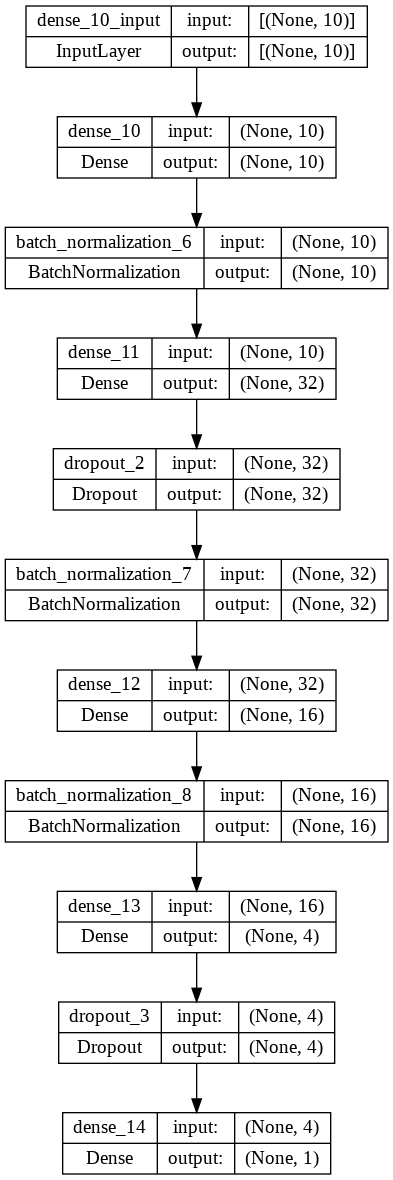

In [19]:
# plot_model(model=create_model(), to_file='NN.png')
plot_model(model=create_model(), to_file='NN.png', show_shapes=True)


In [15]:
# 검증데이터손실(val_loss)가 증가하면 과적합 징후이므로, 검증데이터 손실이 3회 증가하면 early stopping
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=60) #verbose로 학습이 되는 과정을 볼 수 있다, patience는 개선이 없더라도 기다려줄 횟수
# 검증 데이터의 정확도가 이전보다 좋아진 경우에만 모델 저장 
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only= True)

In [20]:
# estimators = []
# estimators.append(('standardize', StandardScaler()))
# estimators.append(('mlp', KerasClassifier(model=create_model, epochs=100, batch_size=8, verbose=1)))
# pipeline = Pipeline(estimators)
# 제외 callbacks=[mc],
model = create_model()
model.fit(X, encoded_Y, epochs=400, callbacks=[mc], batch_size= 8, validation_split= 0.2)

Epoch 1/400
10/16 [=================>............] - ETA: 0s - loss: 1.0676 - accuracy: 0.4625 
Epoch 1: val_accuracy did not improve from 0.78125
16/16 [==============================] - 2s 18ms/step - loss: 1.0711 - accuracy: 0.3984 - val_loss: 2.2818 - val_accuracy: 0.3125
Epoch 2/400
11/16 [===================>..........] - ETA: 0s - loss: 0.7400 - accuracy: 0.5455
Epoch 2: val_accuracy did not improve from 0.78125
16/16 [==============================] - 0s 7ms/step - loss: 0.7366 - accuracy: 0.5078 - val_loss: 1.0566 - val_accuracy: 0.3125
Epoch 3/400
11/16 [===================>..........] - ETA: 0s - loss: 0.7622 - accuracy: 0.5000
Epoch 3: val_accuracy did not improve from 0.78125
16/16 [==============================] - 0s 7ms/step - loss: 0.7814 - accuracy: 0.4844 - val_loss: 0.8480 - val_accuracy: 0.3438
Epoch 4/400
11/16 [===================>..........] - ETA: 0s - loss: 0.6406 - accuracy: 0.5909
Epoch 4: val_accuracy did not improve from 0.78125
16/16 [====================

In [21]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, Y_test, batch_size = 8)[1])) 

6/6 [==============================] - 0s 3ms/step - loss: 0.5483 - accuracy: 0.7805

 테스트 정확도: 0.7805
